# Importing Libraries

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


# Downloading Data

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Making names

In [4]:
class_names = ['T-shirt/top','Pullover','Trouser','Dress','Coat','Sandal','Skirt','Shirt','Sneaker','Bag','Ankle boot']

# Explore the Dataa

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Preprocess The Data

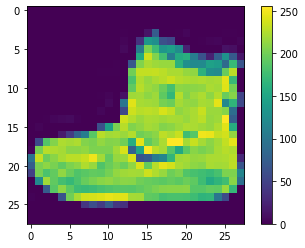

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

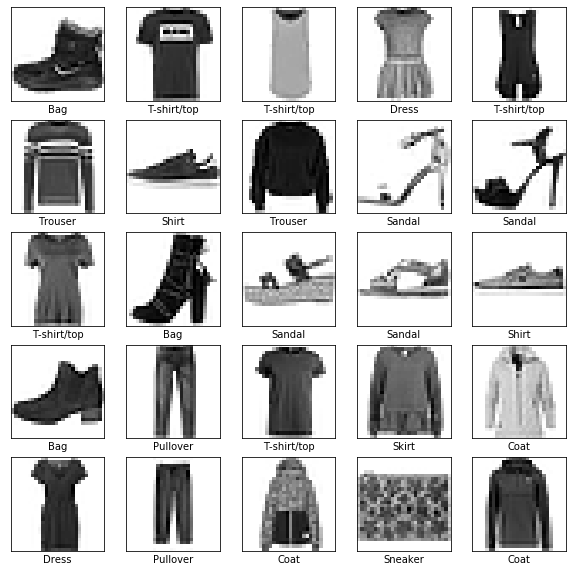

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the Model

# Set up the Layers

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.4954 - acc: 0.8264s - loss: 0.497 - ETA: 1s - loss: 0.4964 - 
Epoch 2/10
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.3747 - acc: 0.8658s - l - ETA: 1s - loss: 0.37
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.3339 - acc: 0.87783s - loss: 0.3343 - ETA: 1s - 
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.3108 - acc: 0.8845A: 7s - loss: 0.3115 - a - ETA: 6s  - ETA: 1s - loss: 0.
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.2924 - acc: 0.89235s - lo - ETA - ETA: 1s - loss:
Epoch 6/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.2785 - acc: 0.89726s - loss: 0.2786 - acc: 0 - ETA: 5s - loss: 0.2789 - a - ETA: - ETA: 2s - loss - ETA: 1s - loss: 0.2
Epoch 7/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2670 - acc: 0.

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\n Test Accuracy", test_acc)

10000/10000 [==============================] - 5s 532us/sample - loss: 0.3356 - acc: 0.8828

 Test Accuracy 0.8828


# Make Predictions

In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([3.4780126e-07, 4.1763024e-11, 1.6906065e-11, 2.3012058e-11,
       9.6682096e-10, 4.7804355e-03, 2.4748106e-08, 4.1860308e-02,
       3.5323200e-08, 9.5335883e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

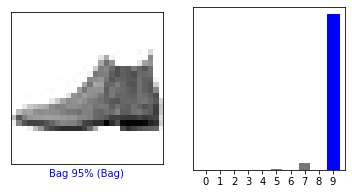

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

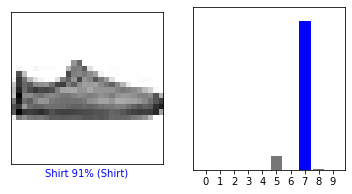

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

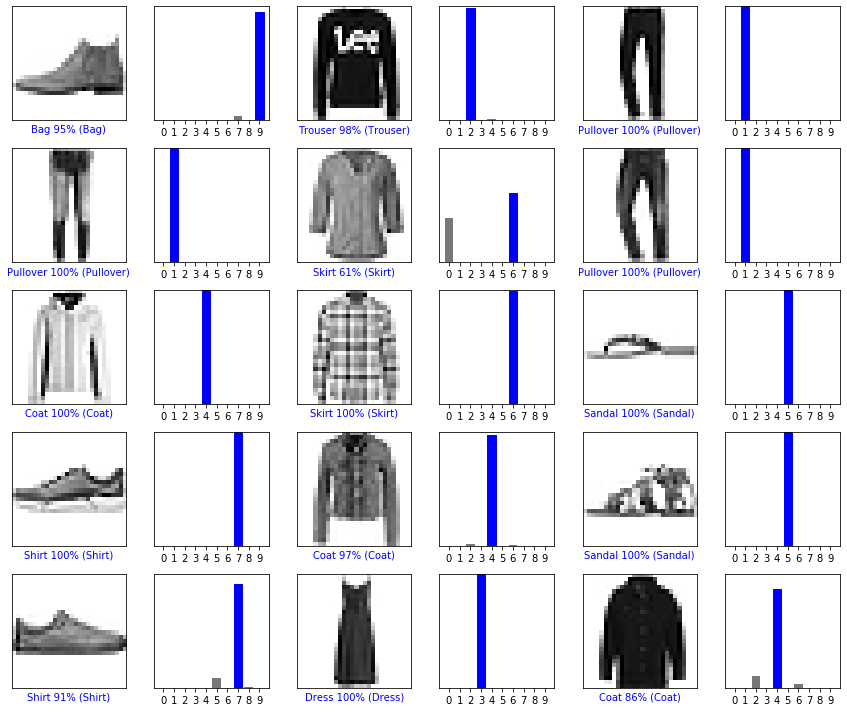

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Grab an Image For Test Dataset

In [30]:
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.9192670e-05 2.5253246e-12 9.8442632e-01 1.9258790e-13 1.4924798e-02
  3.3496622e-08 6.1968114e-04 5.4011323e-15 5.5614685e-10 2.5710270e-10]]


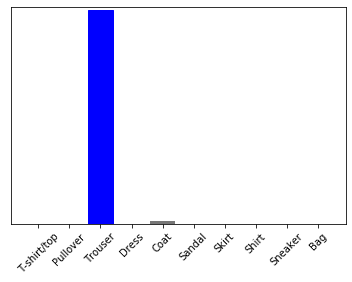

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

2